## Fixed-iteration Method

#### Initiallizing : Clear all global variables if there are remaining variables in the previous work

In [11]:
# Initiallizing : Clear all global variables if there are remaining variables in the previous work
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]

#### Import modules

In [12]:
# Import modules
import os, sys, time, numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy as sp, scipy.optimize as opt

### About a function to find a root

#### function 1 : $x^2 - 4x - lnx$
Interval 1 : $[1; 2]$ <br>
Inverval 2 : $[2; 4]$

root 1 = 1.412391172025309, root 2 = 3.057103549994281


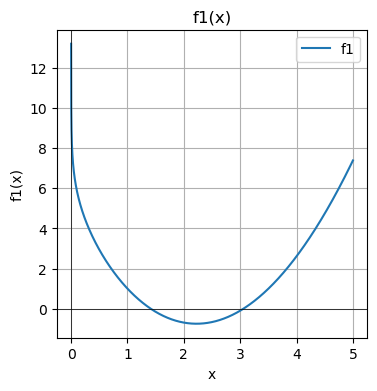

In [13]:
f1 = lambda x : np.power(x, 2) - 4*x + 4 - np.log(x)

############## Roots of function 1 ##############
interval_f1_1 = [1, 2]
interval_f1_2 = [2, 4]

r_interval_f1_1 = opt.root_scalar(f=f1, method='bisect', bracket=interval_f1_1)
r_f1_1 = r_interval_f1_1.root

r_interval_f1_2 = opt.root_scalar(f=f1, method='bisect', bracket=interval_f1_2)
r_f1_2 = r_interval_f1_2.root

print(f'root 1 = {r_f1_1}, root 2 = {r_f1_2}')

############## Plot function 1 ##############
figures, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
x = np.arange(.0001, 5+.0001, .0001)
y = f1(x)
axes.plot(x, y, label='f1')
axes.set_title('f1(x)')
axes.set_xlabel('x')
axes.set_ylabel('f1(x)')
axes.legend()
axes.axhline(y=0, linewidth=0.5, color='k')
axes.axvline(x=0, linewidth=0.5, color='k')
axes.grid()

#### function 2 : $x + 1 - 2sin(pi*x)$
interval 1 : $[0; 0.5]$ <br>
interval 2 : $[0.5; 1]$

root 1 = 0.20603511957051523, root 2 = 0.6819748087382322


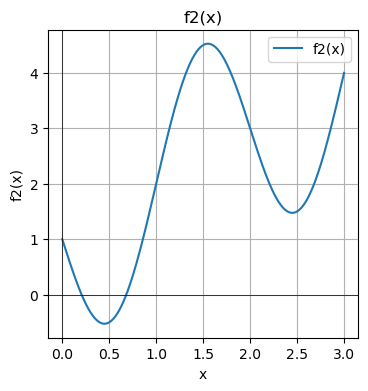

In [14]:
f2 = lambda x : x + 1 - 2*np.sin(np.pi*x)

############## Roots of function 2 ##############
interval_f2_1 = [0, .5]; x0_f2_1 = interval_f2_1[0]
interval_f2_2 = [.5, 1]; x0_f2_2 = interval_f2_2[0]

r_interval_f2_1 = opt.root_scalar(f=f2, method='bisect', bracket=interval_f2_1)
r_f2_1 = r_interval_f2_1.root

r_interval_f2_2 = opt.root_scalar(f=f2, method='bisect', bracket=interval_f2_2)
r_f2_2 = r_interval_f2_2.root

print(f'root 1 = {r_f2_1}, root 2 = {r_f2_2}')

############## Plot of function 2 ##############
figures1, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
x = np.arange(.0001, 3+.0001, .0001)
y = f2(x)
axes1.plot(x, y, label='f2(x)')
axes1.set_title('f2(x)')
axes1.set_xlabel('x')
axes1.set_ylabel('f2(x)')
axes1.legend()
axes1.axhline(y=0, linewidth=.5, color='k')
axes1.axvline(x=0, linewidth=.5, color='k')
axes1.grid()

#### Method Test

In [15]:
# tol = 1e-5

# r0 = interval[0]
# r_new = r0
# k = 0
# err = np.abs(interval[1] - interval[0])
# g = lambda x : f(x) + x
# while err > tol:
#     k = k + 1
#     r_old = r_new
#     r_new = g(r_old)
#     err = np.abs(r_new - r_old)
#     if err < tol:
#         print(f"Converged By Tolerance. {k:d}-th iteration / |r_new - r_old| = {err:.6f} / r = {r_new:.6f} / f(r) = {f(r_new):.6f}")
#         break
#     else:
#         print(f"At {k:d}-th iteration : r_new is {r_new:.6f} and the |r_new - r_old| is {err:.6f}")

#### Define a method

In [ ]:

def fixed_point(func, r0, tol): # arg : root 찾으려는 함수 / 초기 guess / error tolerance
    g = lambda x : func(x) + x # 고정점 반복 함수 g(x) 정의 (f(x) + x)
    
    r_new = r0 # 초기 guess 설정
    k = 0 # iteration number 초기화
    err = 1 # 초기 오차 설정 (1로 시작)
    
    list_k, list_r, list_f = [k], [r0], [func(r0)] # Log 초기화 (iteration 번호, 근 근사값, 함수값)
    
    # Iteration Loop 시작
    while err > tol: # 오차가 tolerance보다 작아질 때까지 반복
        k = k + 1; list_k.append(k) # Iteration number update
        r_old = r_new # 이전 근사값 저장
        r_new = g(r_old) # 새 iteration point 계산 (고정점 반복)
        list_r.append(r_new); list_f.append(func(r_new)) # 근사값 및 함수값 저장
        err = np.abs(r_new - r_old) # 오차 계산
        
        if err < tol: # 오차가 tolerance보다 작으면 수렴
            print(f"Converged By Tolerance. {k:d}-th iteration / r = {r_new:.6f} / f(r) = {func(r_new):.6f} / |r_new - r_old| = {err:.6f}")
            return r_new, np.array(list_k), np.array(list_r), np.array(list_f)
        else: # 아직 수렴하지 않았을 경우 현재 상태 출력
            print(f"At {k:d}-th iteration : r_new is {r_new:.6f} and the |r_new - r_old| is {err:.6f}")


#### Method implementation

##### Root를 찾을 function 및 구간 먼저 선정

In [17]:
######### function / interval setting #########
idx_case = 3
if idx_case == 1:
    f = f1
    a0 = interval_f1_1[0]
    b0 = interval_f1_1[1]
    r = r_f1_1
elif idx_case == 2:
    f = f1
    a0 = interval_f1_2[0]
    b0 = interval_f1_2[1]
    r = r_f1_2
elif idx_case == 3:
    f = f2
    a0 = interval_f2_1[0]
    b0 = interval_f2_1[1]
    r = r_f2_1
else:
    f = f2
    a0 = interval_f2_2[0]
    b0 = interval_f2_2[1]
    r = r_f2_2

#### function 및 구간 선정 후 method로 root finding

In [18]:
result = fixed_point(func=f, r0=a0, tol=1e-5)
result

At 1-th iteration : r_new is 1.000000 and the |r_new - r_old| is 1.000000
At 2-th iteration : r_new is 3.000000 and the |r_new - r_old| is 2.000000
At 3-th iteration : r_new is 7.000000 and the |r_new - r_old| is 4.000000
At 4-th iteration : r_new is 15.000000 and the |r_new - r_old| is 8.000000
At 5-th iteration : r_new is 31.000000 and the |r_new - r_old| is 16.000000
At 6-th iteration : r_new is 63.000000 and the |r_new - r_old| is 32.000000
At 7-th iteration : r_new is 127.000000 and the |r_new - r_old| is 64.000000
At 8-th iteration : r_new is 255.000000 and the |r_new - r_old| is 128.000000
At 9-th iteration : r_new is 511.000000 and the |r_new - r_old| is 256.000000
At 10-th iteration : r_new is 1023.000000 and the |r_new - r_old| is 512.000000
At 11-th iteration : r_new is 2047.000000 and the |r_new - r_old| is 1024.000000
At 12-th iteration : r_new is 4095.000000 and the |r_new - r_old| is 2048.000000
At 13-th iteration : r_new is 8190.999998 and the |r_new - r_old| is 4095.99

/tmp/ipykernel_10488/3760346217.py:1: RuntimeWarning: overflow encountered in scalar multiply
  f2 = lambda x : x + 1 - 2*np.sin(np.pi*x)
/tmp/ipykernel_10488/3760346217.py:1: RuntimeWarning: invalid value encountered in sin
  f2 = lambda x : x + 1 - 2*np.sin(np.pi*x)


#### Error = r* - r

In [19]:
r_sequence = result[2]
err = np.abs(r_sequence - r)
err

TypeError: 'NoneType' object is not subscriptable

#### Error vs Iteration Plot
Fixed-point method는 함수 특성에 따라서 f(x) = 0이 되는 점을 아무리 initial point를 바꿔서 시도해도 못 찾을 수 있음.

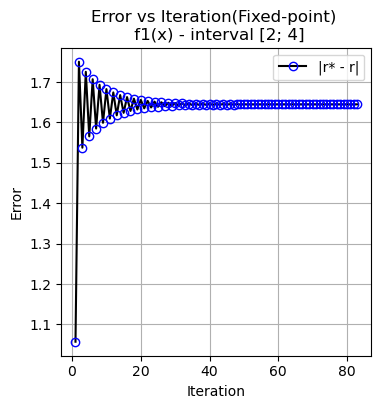

In [ ]:
figures, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
axes.plot(np.arange(len(r_sequence))+1, err, 'o-', markerfacecolor='none', markeredgecolor='blue', color='black', label='|r* - r|')
axes.set_title(f'Error vs Iteration(Fixed-point) \n f{idx_case//3 + 1}(x) - interval [{a0}; {b0}]')
axes.set_xlabel('Iteration')
axes.set_ylabel('Error')
axes.legend()
axes.grid()